In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata

In [2]:
client = Socrata("data.nashville.gov", None)

In [3]:
#endpoint for nashville top 500 monthly searches
#source: https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [4]:
response = requests.get(endpoint)

In [5]:
response

<Response [200]>

In [6]:
response.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

## 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

### Answer: August 2016

In [7]:
endpointfire2016 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'

In [8]:
fire2016 = requests.get(endpointfire2016)

In [9]:
print(fire2016)

<Response [200]>


In [10]:
fire2016.text

'[{"month_name":"January","year":"2016","query_count":"19","query_text":"fire"}\n,{"month_name":"February","year":"2016","query_count":"35","query_text":"fire"}\n,{"month_name":"March","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"April","year":"2016","query_count":"26","query_text":"fire"}\n,{"month_name":"May","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"June","year":"2016","query_count":"31","query_text":"fire"}\n,{"month_name":"July","year":"2016","query_count":"24","query_text":"fire"}\n,{"month_name":"August","year":"2016","query_count":"47","query_text":"fire"}\n,{"month_name":"September","year":"2016","query_count":"36","query_text":"fire"}\n,{"month_name":"October","year":"2016","query_count":"38","query_text":"fire"}\n,{"month_name":"November","year":"2016","query_count":"32","query_text":"fire"}\n,{"month_name":"December","year":"2016","query_count":"38","query_text":"fire"}]\n'

In [11]:
#https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html
fire2016 = pd.read_json('https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire')

In [12]:
fire2016.head()

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire


In [13]:
fire2016 = fire2016.sort_values(by=['query_count'], ascending=False)
fire2016.head()

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire


## 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

### Answer: 1,262

In [14]:
#adjusted code based on solution found by jasmine drumright
#https://stackoverflow.com/questions/27823200/is-there-a-socrata-api-method-to-get-the-row-count-of-a-dataset
query100endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)&$where=query_count>100'

In [15]:
query100 = requests.get(query100endpoint)
print(query100)

<Response [200]>


In [16]:
query100.text

'[{"count":"1262"}]\n'

## 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

### Answer: 56

In [17]:
#"select=count(*)" added based on patrick c's code
code100endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=count(*)&$where=query_text= "codes" AND query_count>100'

In [18]:
code100 = requests.get(code100endpoint)
print(code100)

<Response [200]>


In [19]:
code100.text

'[{"count":"56"}]\n'

## 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [20]:
#added "$limit=50000" based on jasmine & maggie d's code
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

In [21]:
response = requests.get(endpoint)

In [22]:
response

<Response [200]>

In [23]:
response = pd.read_json('https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000')

In [24]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month_name   43677 non-null  object 
 1   year         43677 non-null  int64  
 2   query_count  43676 non-null  float64
 3   query_text   43677 non-null  object 
 4   month        15177 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
response.head(50)

,month_name,year,query_count,query_text,month
0,January,2014,223.0,ebid,NaN
1,January,2014,112.0,property maps,NaN
2,January,2014,97.0,maps,NaN
3,January,2014,90.0,property tax,NaN
4,January,2014,76.0,jobs,NaN
5,January,2014,75.0,employment,NaN
6,January,2014,73.0,human resources,NaN
7,January,2014,62.0,police,NaN
8,January,2014,61.0,criminal court clerk,NaN
9,January,2014,53.0,media releases,NaN


In [54]:
maps = response[response.query_text == 'maps']
maps.head(20)

,month_name,year,query_count,query_text,month
2,January,2014,97.0,maps,NaN
503,February,2014,140.0,maps,NaN
1005,March,2014,144.0,maps,NaN
1503,April,2014,152.0,maps,NaN
2003,May,2014,119.0,maps,NaN
2506,June,2014,121.0,maps,NaN
3006,July,2014,121.0,maps,NaN
3506,August,2014,118.0,maps,NaN
4007,September,2014,115.0,maps,NaN
4508,October,2014,100.0,maps,NaN


In [55]:
maps.tail()

,month_name,year,query_count,query_text,month
39196,November,2020,86.0,maps,11.0
39688,December,2020,113.0,maps,12.0
41188,March,2021,132.0,maps,3.0
41683,April,2021,148.0,maps,4.0
42682,June,2021,151.0,maps,6.0


<function matplotlib.pyplot.show(close=None, block=None)>

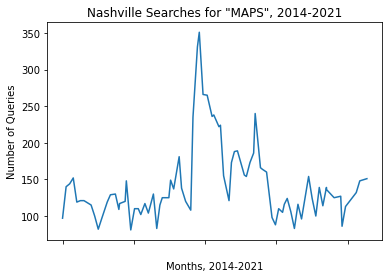

In [57]:
g = plt.plot(maps.index, maps.query_count)
plt.xticks(color='w')
plt.title('Nashville Searches for "MAPS", 2014-2021')
plt.xlabel('Months, 2014-2021')
plt.ylabel('Number of Queries')
plt.show

In [27]:
#https://dev.socrata.com/docs/functions/sum.html
mapsendpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name,sum(query_count)&$group=month_name&$where=query_text="maps"&$limit=50000'

In [28]:
maps = requests.get(mapsendpoint)
maps

<Response [200]>

In [29]:
maps_searches = pd.read_json('https://data.nashville.gov/resource/fuaa-r5cm.json?$select=month_name,sum(query_count)&$group=month_name&$where=query_text="maps"&$limit=50000')

In [30]:
maps_searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   month_name       12 non-null     object
 1   sum_query_count  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [31]:
maps_searches.head(12)

,month_name,sum_query_count
0,April,1309
1,August,991
2,December,556
3,February,832
4,January,924
5,July,1062
6,June,1216
7,March,1090
8,May,1019
9,November,805


In [32]:
maps_searches = maps_searches.sort_values(by=['sum_query_count'], ascending=False)

In [33]:
maps_searches.head(12)

,month_name,sum_query_count
0,April,1309
6,June,1216
7,March,1090
5,July,1062
8,May,1019
1,August,991
10,October,981
11,September,951
4,January,924
3,February,832


In [34]:
maps_searches.month_name = maps_searches.month_name.str[0:3]

In [35]:
maps_searches.head(12)

,month_name,sum_query_count
0,Apr,1309
6,Jun,1216
7,Mar,1090
5,Jul,1062
8,May,1019
1,Aug,991
10,Oct,981
11,Sep,951
4,Jan,924
3,Feb,832


<function matplotlib.pyplot.show(close=None, block=None)>

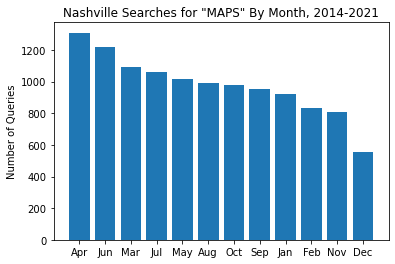

In [58]:
plt.bar(maps_searches.month_name, maps_searches.sum_query_count)
plt.title('Nashville Searches for "MAPS" By Month, 2014-2021')
plt.ylabel('Number of Queries')
plt.show